# Problem Statement:
The dataset pertains to a rapidly expanding company grappling
with a considerable number of employee departures over the 
past three years. Historically, the HR team has responded 
reactively to attrition. However, they now aspire to adopt a 
proactive approach by leveraging available data to predict
employee attrition. The objective is to forecast whether an employee 
will leave the company based on various variables contained within the dataset.

# Need of Attrition Dataset: -

### 1. Anticipation of Employee Attrition:

Supervisors and HR are pivotal in managing the workforce, particularly when they possess insights into employees considering departure from the company. This early awareness allows for proactive steps such as interacting with these employees to persuade them to remain or strategizing recruitment efforts to ensure a well-maintained workforce balance.

# 2.Streamlined Project Progression:
Maintaining a steady and effective workflow within a project hinges on the consistent involvement of all team members. If a key employee unexpectedly decides to leave, it can disrupt the project's progress. Identifying potential attrition enables proactive steps to uphold a seamless and uninterrupted project pipeline.

# 3.Enhanced Recruitment Strategies:
When HR personnel are alerted to employees expressing intentions to depart, they can strategically oversee recruitment procedures. This insight allows them to make informed choices regarding the timing and volume of new hires, ensuring that essential resources are acquired as necessary to sustain operational effectiveness.






# Import Some Basic Packages

In [1]:
import os # Operating system
import numpy as np # mathematical calculation
import pandas as pd # manupulation package or import/export
import matplotlib.pyplot as plt # data visulization
import seaborn as sns # data viz + stats
%matplotlib inline
sns.set()

import warnings 
warnings.filterwarnings("ignore")
import plotly.express as px

In [2]:
dataset = pd.read_csv("Train_Dataset.csv")
dataset.head()

EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
0   5110001.0        0.0  35.0        Rarely  Analytics         5.0   
1   5110002.0        1.0  32.0           Yes      Sales         5.0   
2   5110003.0        0.0  31.0        Rarely  Analytics         5.0   
3   5110004.0        0.0  34.0           Yes      Sales        10.0   
4   5110005.0        0.0  37.0            No  Analytics        27.0   

  EducationField  Gender  HourlnWeek  Involvement  ...  JobSatisfaction ESOPs  \
0             CA    Male        69.0          1.0  ...              1.0   1.0   
1     Statistics  Female        62.0          4.0  ...              2.0   0.0   
2     Statistics       F        45.0          5.0  ...              2.0   1.0   
3     Statistics  Female        32.0          3.0  ...              4.0   1.0   
4     Statistics  Female        49.0          3.0  ...              4.0   1.0   

   NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0                 1.0       1.0                20.0             7.0   
1                 8.0       0.0                20.0             4.0   
2                 3.0       0.0                26.0            12.0   
3                 1.0       0.0                23.0             5.0   
4                 8.0       0.0                21.0            12.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            2.0             NaN              M        18932.0  
1            1.0             NaN         Single        18785.0  
2            1.0             3.0         Single        22091.0  
3            1.0             3.0       Divorsed        20302.0  
4            1.0             9.0       Divorsed        21674.0  

[5 rows x 22 columns]

# Find the information of the Dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

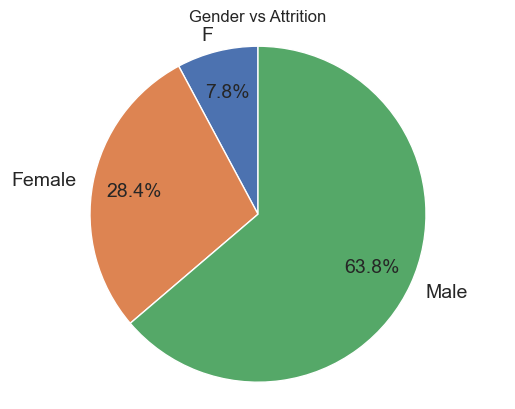

In [4]:
grouped_data = dataset.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)

# Create a pie chart
fig, ax = plt.subplots()

# Define colors
#colors = ['#FF9999', '#66B2FF']

# Plot pie chart
ax.pie(grouped_data[1], labels=grouped_data.index, autopct="%.1f%%", pctdistance=0.75, startangle=90,
        textprops={"size": 14})

# Set axis equal to ensure a circular pie chart
ax.axis('equal')

# Add a title
ax.set_title('Gender vs Attrition')

# Show the plot
plt.show()

In [5]:
dataset = dataset.iloc[0:5180,:]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [6]:
def change_attribute(h):
    h = str(h)
    h = h.lower()
    if 'f' in h:
        return 'Female'
    elif 'm' in h:
        return 'Married'
    return h
dataset['Gender'] = dataset['Gender'].map(change_attribute)
dataset['MaritalStatus'] = dataset['MaritalStatus'].map(change_attribute)

In [7]:
dataset.head()

EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
0   5110001.0        0.0  35.0        Rarely  Analytics         5.0   
1   5110002.0        1.0  32.0           Yes      Sales         5.0   
2   5110003.0        0.0  31.0        Rarely  Analytics         5.0   
3   5110004.0        0.0  34.0           Yes      Sales        10.0   
4   5110005.0        0.0  37.0            No  Analytics        27.0   

  EducationField   Gender  HourlnWeek  Involvement  ...  JobSatisfaction  \
0             CA  Married        69.0          1.0  ...              1.0   
1     Statistics   Female        62.0          4.0  ...              2.0   
2     Statistics   Female        45.0          5.0  ...              2.0   
3     Statistics   Female        32.0          3.0  ...              4.0   
4     Statistics   Female        49.0          3.0  ...              4.0   

  ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0   1.0                 1.0       1.0                20.0             7.0   
1   0.0                 8.0       0.0                20.0             4.0   
2   1.0                 3.0       0.0                26.0            12.0   
3   1.0                 1.0       0.0                23.0             5.0   
4   1.0                 8.0       0.0                21.0            12.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            2.0             NaN        Married        18932.0  
1            1.0             NaN         single        18785.0  
2            1.0             3.0         single        22091.0  
3            1.0             3.0       divorsed        20302.0  
4            1.0             9.0       divorsed        21674.0  

[5 rows x 22 columns]

In [8]:
dataset["Gender"].value_counts()

Gender
Married    3094
Female     2040
nan          46
Name: count, dtype: int64

In [9]:
dataset.head()

EmployeeID  Attrition   Age TravelProfile Department  HomeToWork  \
0   5110001.0        0.0  35.0        Rarely  Analytics         5.0   
1   5110002.0        1.0  32.0           Yes      Sales         5.0   
2   5110003.0        0.0  31.0        Rarely  Analytics         5.0   
3   5110004.0        0.0  34.0           Yes      Sales        10.0   
4   5110005.0        0.0  37.0            No  Analytics        27.0   

  EducationField   Gender  HourlnWeek  Involvement  ...  JobSatisfaction  \
0             CA  Married        69.0          1.0  ...              1.0   
1     Statistics   Female        62.0          4.0  ...              2.0   
2     Statistics   Female        45.0          5.0  ...              2.0   
3     Statistics   Female        32.0          3.0  ...              4.0   
4     Statistics   Female        49.0          3.0  ...              4.0   

  ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0   1.0                 1.0       1.0                20.0             7.0   
1   0.0                 8.0       0.0                20.0             4.0   
2   1.0                 3.0       0.0                26.0            12.0   
3   1.0                 1.0       0.0                23.0             5.0   
4   1.0                 8.0       0.0                21.0            12.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            2.0             NaN        Married        18932.0  
1            1.0             NaN         single        18785.0  
2            1.0             3.0         single        22091.0  
3            1.0             3.0       divorsed        20302.0  
4            1.0             9.0       divorsed        21674.0  

[5 rows x 22 columns]

# Missing Value Treatment

In [10]:
dataset.isnull().sum()/len(dataset)*100

EmployeeID            0.000000
Attrition             0.000000
Age                   6.100386
TravelProfile         0.000000
Department            2.393822
HomeToWork            4.922780
EducationField        0.000000
Gender                0.000000
HourlnWeek            5.540541
Involvement           0.000000
WorkLifeBalance       0.000000
Designation           0.733591
JobSatisfaction       0.000000
ESOPs                 0.000000
NumCompaniesWorked    0.000000
OverTime              0.000000
SalaryHikelastYear    3.262548
WorkExperience        3.610039
LastPromotion         1.351351
CurrentProfile        6.003861
MaritalStatus         0.000000
MonthlyIncome         1.795367
dtype: float64

In [11]:
# Assuming 'dataset' is your DataFrame
for col in dataset.columns:
    if dataset[col].dtype != 'object':
        # Fill missing values in numeric columns with the median
        dataset[col] = dataset[col].fillna(dataset[col].median())
    else:
        # Fill missing values in non-numeric columns with the most frequent value (mode)
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

# Verify if there are still missing values
print(dataset.isnull().sum())

EmployeeID            0
Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64


# Encoding Concept

# Approach 1 : Label encoder

In [12]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your DataFrame
label_encoder = LabelEncoder()

for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

dataset.head()

EmployeeID  Attrition   Age  TravelProfile  Department  HomeToWork  \
0   5110001.0        0.0  35.0              1           0         5.0   
1   5110002.0        1.0  32.0              2           2         5.0   
2   5110003.0        0.0  31.0              1           0         5.0   
3   5110004.0        0.0  34.0              2           2        10.0   
4   5110005.0        0.0  37.0              0           0        27.0   

   EducationField  Gender  HourlnWeek  Involvement  ...  JobSatisfaction  \
0               0       1        69.0          1.0  ...              1.0   
1               5       0        62.0          4.0  ...              2.0   
2               5       0        45.0          5.0  ...              2.0   
3               5       0        32.0          3.0  ...              4.0   
4               5       0        49.0          3.0  ...              4.0   

   ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0    1.0                 1.0       1.0                20.0             7.0   
1    0.0                 8.0       0.0                20.0             4.0   
2    1.0                 3.0       0.0                26.0            12.0   
3    1.0                 1.0       0.0                23.0             5.0   
4    1.0                 8.0       0.0                21.0            12.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            2.0             3.0              0        18932.0  
1            1.0             3.0              2        18785.0  
2            1.0             3.0              2        22091.0  
3            1.0             3.0              1        20302.0  
4            1.0             9.0              1        21674.0  

[5 rows x 22 columns]

# Splitting Data intodependent and independent variable

In [13]:
# first we have to split the data into independent variable and dependent variable
x = dataset.iloc[:,0:]
y = dataset['Attrition']

In [14]:
x = x.drop("Attrition", axis=1)

In [15]:
x.head()

EmployeeID   Age  TravelProfile  Department  HomeToWork  EducationField  \
0   5110001.0  35.0              1           0         5.0               0   
1   5110002.0  32.0              2           2         5.0               5   
2   5110003.0  31.0              1           0         5.0               5   
3   5110004.0  34.0              2           2        10.0               5   
4   5110005.0  37.0              0           0        27.0               5   

   Gender  HourlnWeek  Involvement  WorkLifeBalance  ...  JobSatisfaction  \
0       1        69.0          1.0              1.0  ...              1.0   
1       0        62.0          4.0              3.0  ...              2.0   
2       0        45.0          5.0              3.0  ...              2.0   
3       0        32.0          3.0              2.0  ...              4.0   
4       0        49.0          3.0              4.0  ...              4.0   

   ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0    1.0                 1.0       1.0                20.0             7.0   
1    0.0                 8.0       0.0                20.0             4.0   
2    1.0                 3.0       0.0                26.0            12.0   
3    1.0                 1.0       0.0                23.0             5.0   
4    1.0                 8.0       0.0                21.0            12.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            2.0             3.0              0        18932.0  
1            1.0             3.0              2        18785.0  
2            1.0             3.0              2        22091.0  
3            1.0             3.0              1        20302.0  
4            1.0             9.0              1        21674.0  

[5 rows x 21 columns]

In [16]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

# imbalance treatment

In [17]:
import imblearn

In [18]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(x,y)

In [19]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=101,stratify=y_over)

In [20]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5229, 21) (2241, 21) (5229,) (2241,)


In [21]:
print("Original Count :", y.value_counts())
print("**************"*10)
print("After Oversampling :", y_over.value_counts())
print("***************"*10)
print("Now new datashape is :", x_over.shape)

Original Count : Attrition
0.0    3735
1.0    1445
Name: count, dtype: int64
********************************************************************************************************************************************
After Oversampling : Attrition
0.0    3735
1.0    3735
Name: count, dtype: int64
******************************************************************************************************************************************************
Now new datashape is : (7470, 21)


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
a = scaler.fit_transform(x)
pd.DataFrame(a).head()

0         1    2    3         4    5    6         7    8    9   ...  \
0 -1.000000 -0.209302  0.0 -1.0 -0.933333 -1.0  0.0  0.325843 -1.0 -1.0  ...   
1 -0.999614 -0.348837  1.0  1.0 -0.933333  1.0 -1.0  0.168539  0.5  0.0  ...   
2 -0.999228 -0.395349  0.0 -1.0 -0.933333  1.0 -1.0 -0.213483  1.0  0.0  ...   
3 -0.998841 -0.255814  1.0  1.0 -0.850000  1.0 -1.0 -0.505618  0.0 -0.5  ...   
4 -0.998455 -0.116279 -1.0 -1.0 -0.566667  1.0 -1.0 -0.123596  0.0  0.5  ...   

    11   12        13   14        15        16     17        18   19        20  
0 -1.0  1.0 -0.904762  1.0 -0.466667 -0.658537 -0.750 -0.666667 -1.0 -0.618468  
1 -0.5 -1.0 -0.238095 -1.0 -0.466667 -0.804878 -0.875 -0.666667  1.0 -0.621596  
2 -0.5  1.0 -0.714286 -1.0  0.333333 -0.414634 -0.875 -0.666667  1.0 -0.551255  
3  0.5  1.0 -0.904762 -1.0 -0.066667 -0.756098 -0.875 -0.666667  0.0 -0.589319  
4  0.5  1.0 -0.238095 -1.0 -0.333333 -0.414634 -0.875  0.000000  0.0 -0.560128  

[5 rows x 21 columns]

In [23]:
test1 = scaler.transform(x_test)
pd.DataFrame(test1).head()

0         1    2    3         4    5    6         7    8    9   ...  \
0  0.492952 -0.302326  0.0  1.0 -0.933333  0.2  0.0 -0.011236  0.5  0.5  ...   
1 -0.532342  0.023256  0.0  1.0 -0.883333 -0.6  0.0  0.078652  0.0  0.0  ...   
2 -0.688357 -0.162791  0.0 -1.0 -0.900000  1.0 -1.0  0.011236 -0.5  0.0  ...   
3 -0.835103  0.534884  0.0 -1.0 -0.933333  1.0  0.0  0.101124  0.0  1.0  ...   
4  0.467079 -0.162791  0.0 -1.0 -0.600000  1.0  0.0 -0.101124  0.5  0.5  ...   

    11   12        13   14        15        16     17        18   19        20  
0  0.5 -1.0 -0.238095  1.0 -0.733333 -0.609756 -0.625 -0.666667  1.0 -0.470064  
1 -0.5  1.0 -0.619048 -1.0 -0.466667 -0.024390 -0.875 -0.888889  0.0 -0.636468  
2 -0.5 -1.0 -0.714286 -1.0 -0.866667 -0.756098 -1.000 -1.000000  0.0 -0.637489  
3  0.0  1.0 -0.142857  1.0 -0.866667 -0.121951 -0.750 -0.222222  0.0 -0.592340  
4  0.0 -1.0 -0.523810  1.0 -0.600000 -0.707317 -1.000 -0.666667  1.0 -0.658979  

[5 rows x 21 columns]

<Axes: >

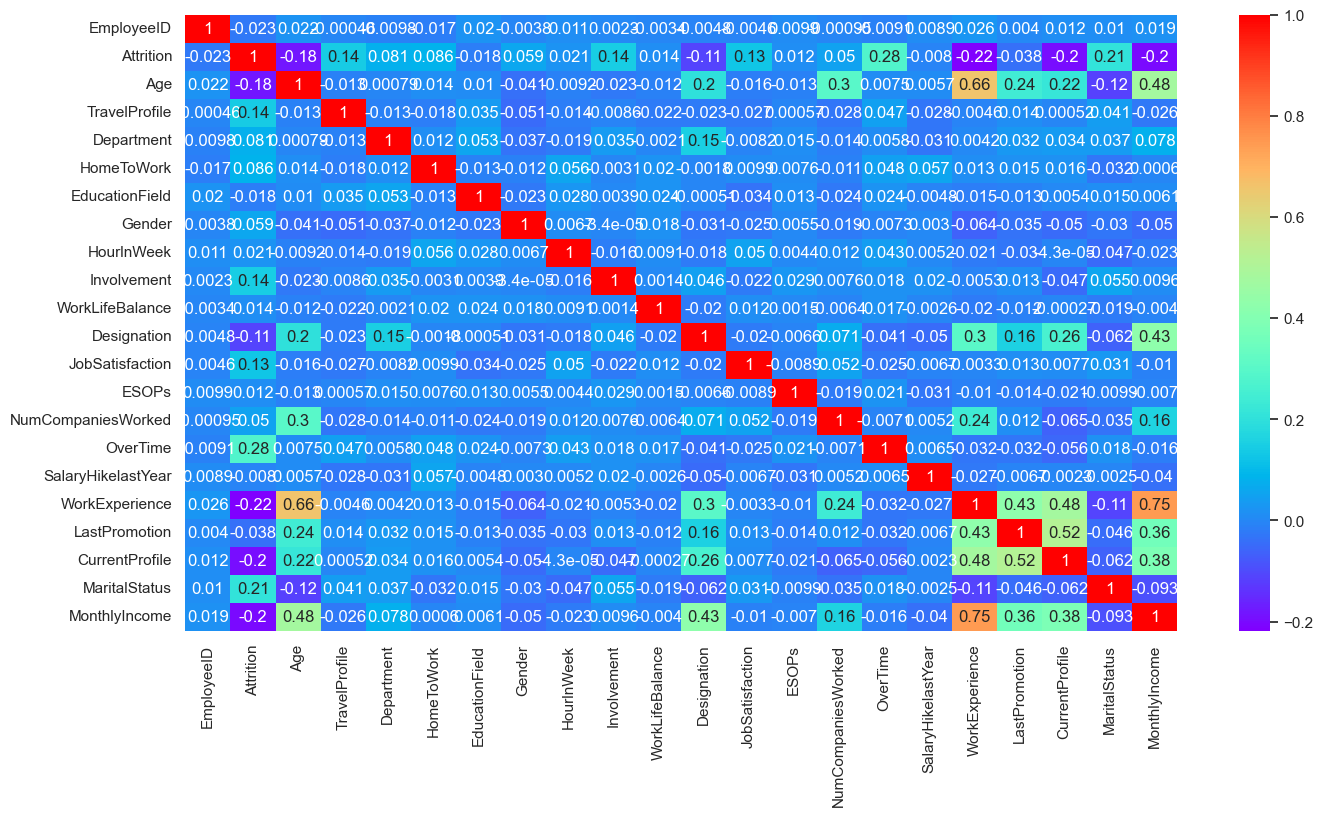

In [24]:
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr(), annot=True, cmap='rainbow')

# Building Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver='newton-cg')
logit_model.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [26]:
x_train.head()

EmployeeID   Age  TravelProfile  Department  HomeToWork  EducationField  \
4481   5114482.0  36.0              1           0         5.0               5   
1036   5111037.0  40.0              1           0        13.0               0   
5632   5112377.0  59.0              1           0         5.0               1   
7078   5110867.0  32.0              1           2        16.0               0   
2790   5112791.0  24.0              1           0         9.0               5   

      Gender  HourlnWeek  Involvement  WorkLifeBalance  ...  JobSatisfaction  \
4481       1        49.0          4.0              3.0  ...              1.0   
1036       1        67.0          3.0              4.0  ...              3.0   
5632       1        53.0          3.0              1.0  ...              3.0   
7078       1        48.0          3.0              1.0  ...              5.0   
2790       1        65.0          1.0              5.0  ...              5.0   

      ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
4481    0.0                 2.0       0.0                28.0             2.0   
1036    0.0                 8.0       0.0                27.0            10.0   
5632    0.0                 5.0       0.0                30.0             8.0   
7078    1.0                 3.0       0.0                23.0            10.0   
2790    1.0                 2.0       1.0                27.0             2.0   

      LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
4481            2.0             1.0              2        17102.0  
1036            3.0             3.0              2        29464.0  
5632            1.0             1.0              2        18479.0  
7078            2.0             3.0              0        20233.0  
2790            1.0             1.0              0        17601.0  

[5 rows x 21 columns]

In [27]:
# Predict the model with train and test
y_pred_train = logit_model.predict(x_train)
y_pred_test =  logit_model.predict(x_test)

# Evaluation metrics

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
print(confusion_matrix(y_train, y_pred_train))
print("**************"*10)
print(confusion_matrix(y_test, y_pred_test))

[[1965  650]
 [ 623 1991]]
********************************************************************************************************************************************
[[835 285]
 [296 825]]


In [30]:
acc_score_lg_train =  accuracy_score(y_train, y_pred_train)
acc_score_lg_test=  accuracy_score(y_test, y_pred_test)

In [31]:
print(classification_report(y_train, y_pred_train))
print("**************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.76      0.75      0.76      2615
         1.0       0.75      0.76      0.76      2614

    accuracy                           0.76      5229
   macro avg       0.76      0.76      0.76      5229
weighted avg       0.76      0.76      0.76      5229

********************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.74      1120
         1.0       0.74      0.74      0.74      1121

    accuracy                           0.74      2241
   macro avg       0.74      0.74      0.74      2241
weighted avg       0.74      0.74      0.74      2241



# Decision Tree Model Building

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree1 =  DecisionTreeClassifier(criterion="gini")
dtree1.fit(x_train , y_train)

DecisionTreeClassifier()

In [33]:
dtree2 = DecisionTreeClassifier(criterion="entropy")
dtree2.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
y_pred_train_dtree1 = dtree1.predict(x_train)
y_pred_test_dtree1 = dtree1.predict(x_test)

In [35]:
y_pred_train_dtree2 = dtree2.predict(x_train)
y_pred_test_dtree2= dtree2.predict(x_test)

In [36]:
print(confusion_matrix(y_train, y_pred_train_dtree1))
print("**************"*10)
print(confusion_matrix(y_test, y_pred_test_dtree1))

[[2615    0]
 [   0 2614]]
********************************************************************************************************************************************
[[1064   56]
 [   6 1115]]


In [37]:
print(confusion_matrix(y_train, y_pred_train_dtree2 ))
print("**************"*10)
print(confusion_matrix(y_test, y_pred_test_dtree2))

[[2615    0]
 [   0 2614]]
********************************************************************************************************************************************
[[1046   74]
 [  11 1110]]


In [38]:
acc_score_dtree1_train =  accuracy_score(y_train, y_pred_train_dtree1)
acc_score_dtree1_test = accuracy_score(y_test, y_pred_test_dtree1)

In [39]:
print(classification_report(y_train, y_pred_train_dtree1))
print("**************"*10)
print(classification_report(y_test, y_pred_test_dtree1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2615
         1.0       1.00      1.00      1.00      2614

    accuracy                           1.00      5229
   macro avg       1.00      1.00      1.00      5229
weighted avg       1.00      1.00      1.00      5229

********************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1120
         1.0       0.95      0.99      0.97      1121

    accuracy                           0.97      2241
   macro avg       0.97      0.97      0.97      2241
weighted avg       0.97      0.97      0.97      2241



In [40]:
acc_score_dtree2_train =  accuracy_score(y_train, y_pred_train_dtree2)
acc_score_dtree2_test =  accuracy_score(y_test, y_pred_test_dtree2)

In [41]:
print(classification_report(y_train, y_pred_train_dtree2))
print("**************"*10)
print(classification_report(y_test, y_pred_test_dtree2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2615
         1.0       1.00      1.00      1.00      2614

    accuracy                           1.00      5229
   macro avg       1.00      1.00      1.00      5229
weighted avg       1.00      1.00      1.00      5229

********************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      1120
         1.0       0.94      0.99      0.96      1121

    accuracy                           0.96      2241
   macro avg       0.96      0.96      0.96      2241
weighted avg       0.96      0.96      0.96      2241



# Post Pruning 

In [42]:
a=dtree1.feature_importances_

In [43]:
df_feature_importance = pd.DataFrame(index=x.columns,
                                      data=dtree1.feature_importances_,
                                      columns=["Feature Importance"])
print(df_feature_importance)

                    Feature Importance
EmployeeID                    0.011578
Age                           0.102227
TravelProfile                 0.029245
Department                    0.038188
HomeToWork                    0.066184
EducationField                0.024053
Gender                        0.025274
HourlnWeek                    0.070564
Involvement                   0.025008
WorkLifeBalance               0.004529
Designation                   0.010384
JobSatisfaction               0.062344
ESOPs                         0.000000
NumCompaniesWorked            0.051868
OverTime                      0.092405
SalaryHikelastYear            0.047862
WorkExperience                0.065149
LastPromotion                 0.042158
CurrentProfile                0.070262
MaritalStatus                 0.045836
MonthlyIncome                 0.114883


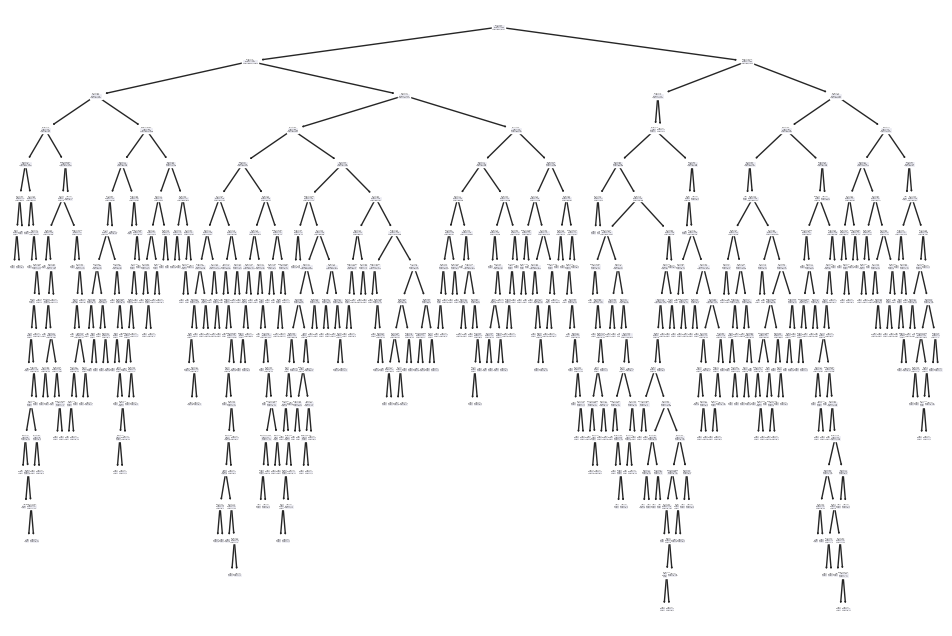

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtree1)
plt.show()

In [45]:
y_train.value_counts()

Attrition
0.0    2615
1.0    2614
Name: count, dtype: int64

In [46]:
#let's see depth of Decision Tree 
depth = dtree1.tree_.max_depth
print("Depth of dtree1, Decision Tree is: ",depth)

Depth of dtree1, Decision Tree is:  17


In [47]:
# Using hyperparameter in Dtree to apply post-prunning method
prunned_tree = DecisionTreeClassifier(criterion='gini', max_depth=16)
prunned_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16)

In [48]:
# User Define Funcation
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree

def report_model(model, x_test, y_test, x):
    model_preds = model.predict(x_test)
    
    # Print classification report
    print("Classification Report:\n", classification_report(y_test, model_preds))
    
    # Print accuracy score
    print("Accuracy Score:", accuracy_score(y_test, model_preds))
    
    # Plot decision tree
    plt.figure(figsize=(12, 8), dpi=150)
    
    # Convert the index to a list
    feature_names = x.columns.tolist()
    
    plot_tree(model, filled=True, feature_names=feature_names, class_names=[str(i) for i in model.classes_])
    
    # Show the plot
    plt.show()


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1120
         1.0       0.95      0.99      0.97      1121

    accuracy                           0.97      2241
   macro avg       0.97      0.97      0.97      2241
weighted avg       0.97      0.97      0.97      2241

Accuracy Score: 0.9718875502008032


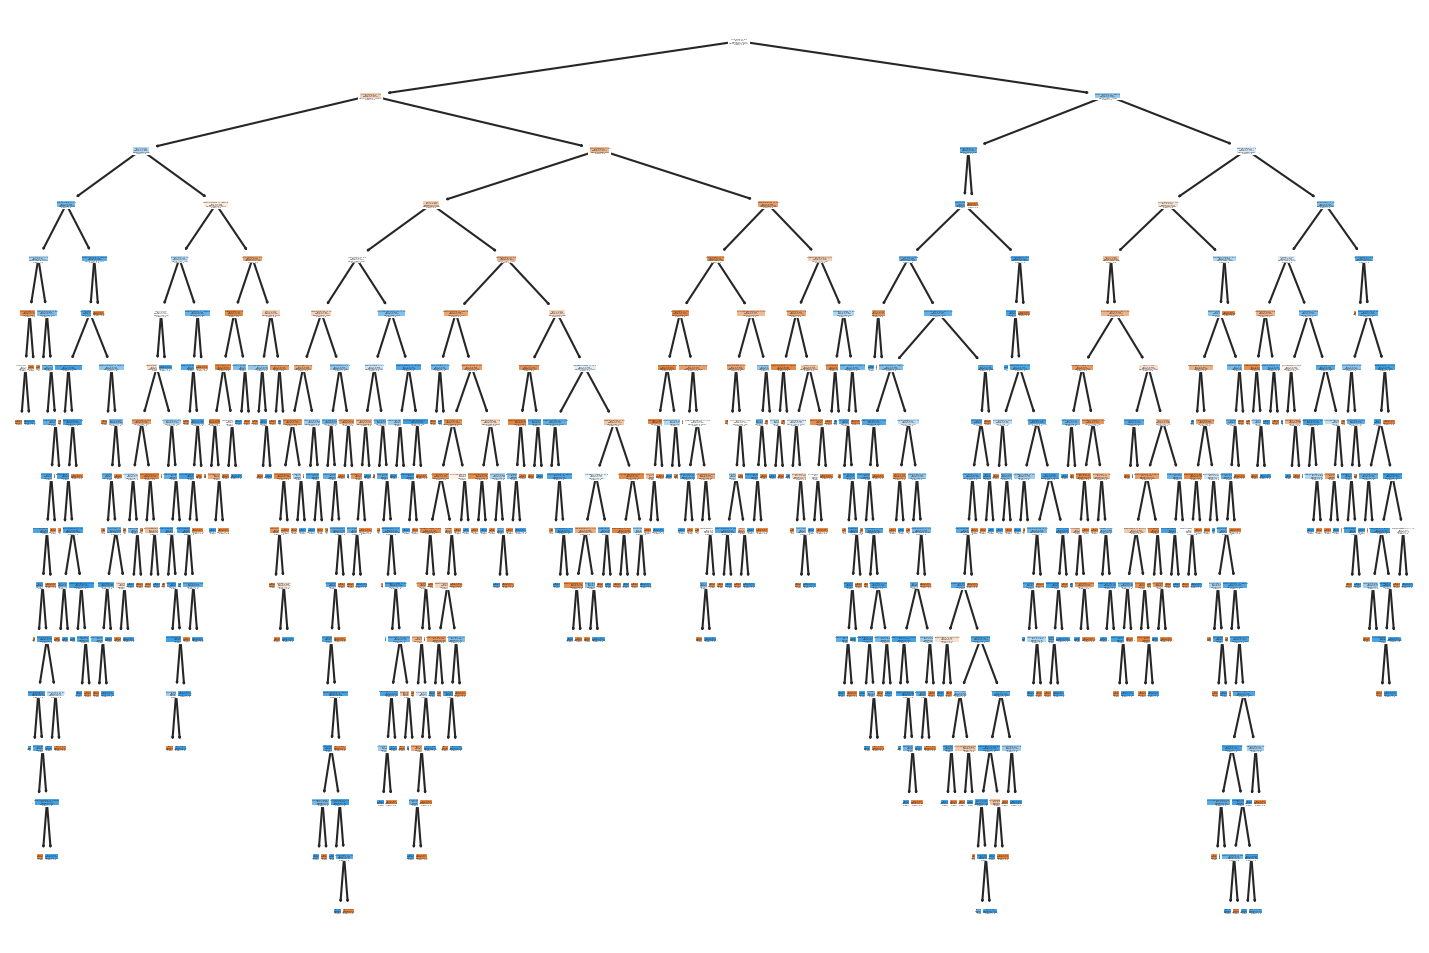

In [49]:
report_model(prunned_tree, x_test, y_test, x)

# Model - Bagging Classifier

In [50]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=3, max_features=0.5)
bagging.fit(x_train, y_train)

BaggingClassifier(max_features=0.5, n_estimators=3)

In [51]:
y_pred_train_bagging = bagging.predict(x_train)
y_pred_test_bagging = bagging.predict(x_test)

In [52]:
acc_bgc_train = accuracy_score(y_train, y_pred_train_bagging)
acc_bgc_test =accuracy_score(y_test, y_pred_test_bagging)
acc_bgc_train

0.9890992541594952

In [53]:
print(classification_report(y_train, y_pred_train_bagging))
print()
print(classification_report(y_test, y_pred_test_bagging))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2615
         1.0       0.98      1.00      0.99      2614

    accuracy                           0.99      5229
   macro avg       0.99      0.99      0.99      5229
weighted avg       0.99      0.99      0.99      5229


              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      1120
         1.0       0.90      0.98      0.93      1121

    accuracy                           0.93      2241
   macro avg       0.94      0.93      0.93      2241
weighted avg       0.94      0.93      0.93      2241



# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=8)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500)

In [55]:
# Predict test data with linear model
y_pred_train_cl = rf_classifier.predict(x_train)
y_pred_test_cl = rf_classifier.predict(x_test)

In [56]:
acc_score_rf_train =  accuracy_score(y_train, y_pred_train_cl)
acc_score_rf_test =  accuracy_score(y_test, y_pred_test_cl)

In [57]:
print(classification_report(y_train, y_pred_train_cl))
print("**************"*10)
print(classification_report(y_test, y_pred_test_cl))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      2615
         1.0       0.96      0.94      0.95      2614

    accuracy                           0.95      5229
   macro avg       0.95      0.95      0.95      5229
weighted avg       0.95      0.95      0.95      5229

********************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      1120
         1.0       0.92      0.91      0.92      1121

    accuracy                           0.92      2241
   macro avg       0.92      0.92      0.92      2241
weighted avg       0.92      0.92      0.92      2241



In [58]:
print(confusion_matrix(y_train, y_pred_train_cl))
print("**************"*10)
print(confusion_matrix(y_test, y_pred_test_cl))

[[2508  107]
 [ 159 2455]]
********************************************************************************************************************************************
[[1037   83]
 [ 103 1018]]


# Model : AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [60]:
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)

In [61]:
print(confusion_matrix(y_train, y_pred_train_ada))
print()
print(confusion_matrix(y_test, y_pred_test_ada))

[[2075  540]
 [ 521 2093]]

[[866 254]
 [284 837]]


In [62]:
acc_ada_train = accuracy_score(y_train, y_pred_train_ada)
acc_ada_test = accuracy_score(y_test, y_pred_test_ada)

In [63]:
print(classification_report(y_train, y_pred_train_ada))
print()
print(classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      2615
         1.0       0.79      0.80      0.80      2614

    accuracy                           0.80      5229
   macro avg       0.80      0.80      0.80      5229
weighted avg       0.80      0.80      0.80      5229


              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76      1120
         1.0       0.77      0.75      0.76      1121

    accuracy                           0.76      2241
   macro avg       0.76      0.76      0.76      2241
weighted avg       0.76      0.76      0.76      2241



# Model  - Gradient Boosting Algorithm

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gdm = GradientBoostingClassifier()
gdm.fit(x_train, y_train)

GradientBoostingClassifier()

In [65]:
y_pred_train_gdm = gdm.predict(x_train)
y_pred_test_gdm = gdm.predict(x_test)

In [66]:
acc_gbc_train= accuracy_score(y_train, y_pred_train_gdm)
acc_gbc_test = accuracy_score(y_test, y_pred_test_gdm)

In [67]:
print(classification_report(y_train, y_pred_train_gdm))
print()
print(classification_report(y_test, y_pred_test_gdm))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2615
         1.0       0.89      0.89      0.89      2614

    accuracy                           0.89      5229
   macro avg       0.89      0.89      0.89      5229
weighted avg       0.89      0.89      0.89      5229


              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1120
         1.0       0.86      0.85      0.85      1121

    accuracy                           0.86      2241
   macro avg       0.86      0.86      0.86      2241
weighted avg       0.86      0.86      0.86      2241



In [68]:
print(confusion_matrix(y_train, y_pred_train_gdm))
print()
print(confusion_matrix(y_test, y_pred_test_gdm))

[[2331  284]
 [ 286 2328]]

[[962 158]
 [166 955]]


# Model  - XGBoost Classification

In [69]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=500, max_depth=8, learning_rate=0.001)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [71]:
acc_xgb_train = accuracy_score(y_train, y_pred_train_xgb)
acc_xgb_test = accuracy_score(y_test, y_pred_test_xgb)

In [72]:
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      2615
         1.0       0.94      0.95      0.95      2614

    accuracy                           0.95      5229
   macro avg       0.95      0.95      0.95      5229
weighted avg       0.95      0.95      0.95      5229


              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      1120
         1.0       0.91      0.91      0.91      1121

    accuracy                           0.91      2241
   macro avg       0.91      0.91      0.91      2241
weighted avg       0.91      0.91      0.91      2241



In [73]:
print(confusion_matrix(y_train, y_pred_train_xgb))
print()
print(confusion_matrix(y_test, y_pred_test_xgb))

[[2468  147]
 [ 139 2475]]

[[1015  105]
 [ 105 1016]]


# Model Building Support Vector Machine(SVM)

## 1) Kernel = 'linear'
## 2) Kernel = 'sigmoid'
## 3) kernel = 'poly'
## 4) kernel = 'rbf' ***universal/ bydefault method

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.fit_transform(x_test)
pd.DataFrame(x_train1).head()
pd.DataFrame(x_test1).head()

0         1    2    3         4    5    6         7    8    9   ...  \
0  0.493045 -0.302326  0.0  1.0 -0.933333  0.2  0.0 -0.186441  0.5  0.5  ...   
1 -0.532844  0.023256  0.0  1.0 -0.883333 -0.6  0.0 -0.050847  0.0  0.0  ...   
2 -0.688949 -0.162791  0.0 -1.0 -0.900000  1.0 -1.0 -0.152542 -0.5  0.0  ...   
3 -0.835781  0.534884  0.0 -1.0 -0.933333  1.0  0.0 -0.016949  0.0  1.0  ...   
4  0.467156 -0.162791  0.0 -1.0 -0.600000  1.0  0.0 -0.322034  0.5  0.5  ...   

    11   12        13   14        15        16     17        18   19        20  
0  0.5 -1.0 -0.157895  1.0 -0.733333 -0.609756 -0.625 -0.666667  1.0  0.423298  
1 -0.5  1.0 -0.578947 -1.0 -0.466667 -0.024390 -0.875 -0.888889  0.0 -0.023629  
2 -0.5 -1.0 -0.684211 -1.0 -0.866667 -0.756098 -1.000 -1.000000  0.0 -0.026372  
3  0.0  1.0 -0.052632  1.0 -0.866667 -0.121951 -0.750 -0.222222  0.0  0.094888  
4  0.0 -1.0 -0.473684  1.0 -0.600000 -0.707317 -1.000 -0.666667  1.0 -0.084088  

[5 rows x 21 columns]

In [75]:
from sklearn.svm import SVC

In [76]:
# kernel = 'linear'

svc_l = SVC(kernel='linear')
svc_lr = svc_l.fit(x_train1, y_train)
y_pred_train = svc_l.predict(x_train1)
y_pred_test = svc_l.predict(x_test1)
accuracy_score_lr_train = accuracy_score(y_train, y_pred_train)
accuracy_score_lr_test = accuracy_score(y_test, y_pred_test)
print("Train Accuracy score: ",accuracy_score_lr_train )
print("Test Accuracy Score: ",accuracy_score_lr_test)
print("--------"*7)

Train Accuracy score:  0.7599923503537961
Test Accuracy Score:  0.50111557340473
--------------------------------------------------------


In [77]:
# kernel = 'sigmoid'
svc_s = SVC(kernel='sigmoid')
svc_sg = svc_s.fit(x_train1, y_train)
y_pred_train_s = svc_s.predict(x_train1)
y_pred_test_s = svc_s.predict(x_test1)
accuracy_score_sg_train = accuracy_score(y_train, y_pred_train_s)
accuracy_score_sg_test = accuracy_score(y_test, y_pred_test_s)
print("Sigmoid Model:- ")
print()
print("Train Accuracy score: ",accuracy_score_sg_train )
print("Test Accuracy Score: ",accuracy_score_sg_test)
print("--------"*7)

Sigmoid Model:- 

Train Accuracy score:  0.6035570854847964
Test Accuracy Score:  0.6323070058009818
--------------------------------------------------------


In [78]:
# kernel = 'poly'
svc_p = SVC(kernel='poly')
svc_pl = svc_p.fit(x_train1, y_train)
y_pred_train_p = svc_p.predict(x_train1)
y_pred_test_p = svc_p.predict(x_test1)
accuracy_score_pl_train = accuracy_score(y_train, y_pred_train_p)
accuracy_score_pl_test = accuracy_score(y_test, y_pred_test_p)
print("Poly Model:- ")
print()
print("Train Accuracy score: ",accuracy_score_pl_train )
print("Test Accuracy Score: ",accuracy_score_pl_test)
print("--------"*7)

Poly Model:- 

Train Accuracy score:  0.9045706636068082
Test Accuracy Score:  0.6916555109326193
--------------------------------------------------------


In [79]:
# kernel = 'rbf'
svc_r = SVC(kernel='rbf')
svc_rbf = svc_r.fit(x_train1, y_train)
y_pred_train_rbf = svc_r.predict(x_train1)
y_pred_test_rbf = svc_r.predict(x_test1)
accuracy_score_rbf_train = accuracy_score(y_train, y_pred_train_rbf)
accuracy_score_rbf_test = accuracy_score(y_test, y_pred_test_rbf)
print("Sigmoid Model:- ")
print()
print("Train Accuracy score: ",accuracy_score_rbf_train )
print("Test Accuracy Score: ",accuracy_score_rbf_test)
print("--------"*7)

Sigmoid Model:- 

Train Accuracy score:  0.8802830369095429
Test Accuracy Score:  0.6581883087907184
--------------------------------------------------------


In [80]:
# Naive Bayes Theorm

In [81]:
#  GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train1, y_train)
y_pred_train_gnb = gnb.predict(x_train1)
y_pred_test_gnb = gnb.predict(x_test1)
accuracy_score_gnb_train = accuracy_score(y_train, y_pred_train_gnb)
accuracy_score_gnb_test = accuracy_score(y_test, y_pred_test_gnb)
print("Naive Bayes Model(GaussianNB):- ")
print()
print("Train Accuracy score: ",accuracy_score_gnb_train )
print("Test Accuracy Score: ",accuracy_score_gnb_test)
print("--------"*7)

# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb = bnb.fit(x_train1, y_train)
y_pred_train_bnb = bnb.predict(x_train1)
y_pred_test_bnb = bnb.predict(x_test1)
accuracy_score_bnb_train = accuracy_score(y_train, y_pred_train_bnb)
accuracy_score_bnb_test = accuracy_score(y_test, y_pred_test_bnb)
print("Naive Bayes Model(BernoulliNB):- ")
print()
print("Train Accuracy score: ",accuracy_score_bnb_train )
print("Test Accuracy Score: ",accuracy_score_bnb_test)
print("--------"*7)

list1 = ['SVM_Linear','SVM_Sigmoid','SVM_Poly','SVM_RBF','GNB','BNB']
list2 = [accuracy_score_lr_test,accuracy_score_sg_test,accuracy_score_pl_test,
        accuracy_score_rbf_test,accuracy_score_gnb_test,accuracy_score_bnb_test]
list3 = [accuracy_score_lr_train,accuracy_score_sg_train,accuracy_score_pl_train,
        accuracy_score_rbf_train,accuracy_score_gnb_train,accuracy_score_bnb_train]

dataset_test_accuracy = pd.DataFrame({'Method Used':list1, "Accuracy": list2})
dataset_train_accuracy = pd.DataFrame({'Method Used':list1, "Accuracy": list3})

Naive Bayes Model(GaussianNB):- 

Train Accuracy score:  0.6882769171925799
Test Accuracy Score:  0.499776885319054
--------------------------------------------------------
Naive Bayes Model(BernoulliNB):- 

Train Accuracy score:  0.7079747561675273
Test Accuracy Score:  0.7014725568942436
--------------------------------------------------------


Axes(0.125,0.11;0.775x0.77)


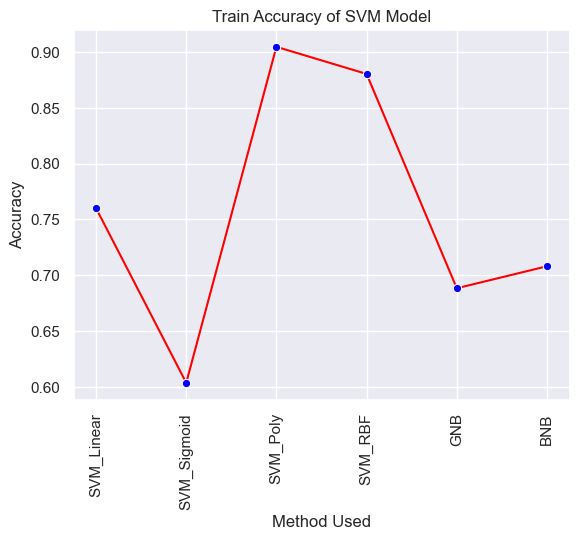

In [82]:
train_plot = sns.lineplot(x = 'Method Used', y = 'Accuracy',data = dataset_train_accuracy, color = 'red', marker = 'o', markerfacecolor = 'blue')
train_plot.set_xticklabels(train_plot.get_xticklabels(), rotation = 90)
plt.title("Train Accuracy of SVM Model")
print(train_plot)

Axes(0.125,0.11;0.775x0.77)


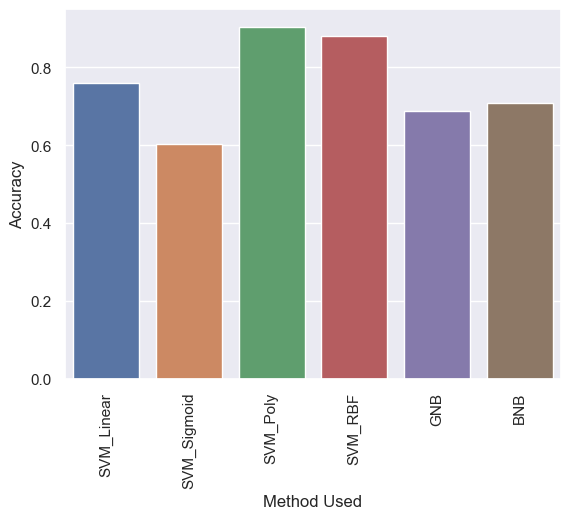

In [83]:
chart = sns.barplot(x='Method Used', y='Accuracy', data=dataset_train_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

Axes(0.125,0.11;0.775x0.77)


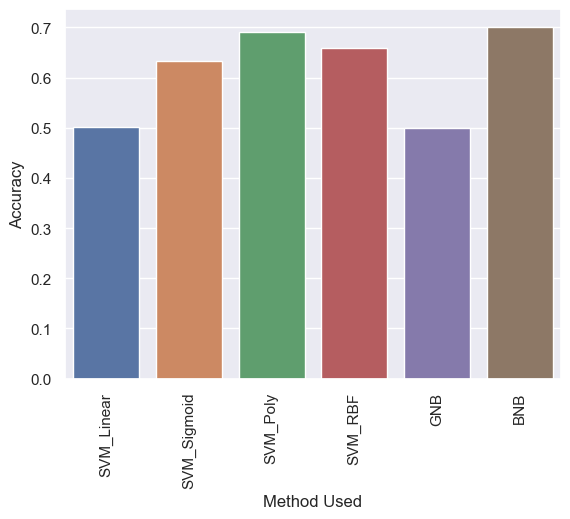

In [84]:
chart = sns.barplot(x='Method Used', y='Accuracy', data=dataset_test_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

# support vector machine - rbf approach

In [85]:
x_test1 = pd.DataFrame(x_test1)

In [86]:
x_test1.head()

0         1    2    3         4    5    6         7    8    9   ...  \
0  0.493045 -0.302326  0.0  1.0 -0.933333  0.2  0.0 -0.186441  0.5  0.5  ...   
1 -0.532844  0.023256  0.0  1.0 -0.883333 -0.6  0.0 -0.050847  0.0  0.0  ...   
2 -0.688949 -0.162791  0.0 -1.0 -0.900000  1.0 -1.0 -0.152542 -0.5  0.0  ...   
3 -0.835781  0.534884  0.0 -1.0 -0.933333  1.0  0.0 -0.016949  0.0  1.0  ...   
4  0.467156 -0.162791  0.0 -1.0 -0.600000  1.0  0.0 -0.322034  0.5  0.5  ...   

    11   12        13   14        15        16     17        18   19        20  
0  0.5 -1.0 -0.157895  1.0 -0.733333 -0.609756 -0.625 -0.666667  1.0  0.423298  
1 -0.5  1.0 -0.578947 -1.0 -0.466667 -0.024390 -0.875 -0.888889  0.0 -0.023629  
2 -0.5 -1.0 -0.684211 -1.0 -0.866667 -0.756098 -1.000 -1.000000  0.0 -0.026372  
3  0.0  1.0 -0.052632  1.0 -0.866667 -0.121951 -0.750 -0.222222  0.0  0.094888  
4  0.0 -1.0 -0.473684  1.0 -0.600000 -0.707317 -1.000 -0.666667  1.0 -0.084088  

[5 rows x 21 columns]

In [87]:
output_test = pd.concat([x_test1, pd.DataFrame(x_test1)], axis=1)
output_test

0         1    2    3         4    5    6         7    8    9   \
0     0.493045 -0.302326  0.0  1.0 -0.933333  0.2  0.0 -0.186441  0.5  0.5   
1    -0.532844  0.023256  0.0  1.0 -0.883333 -0.6  0.0 -0.050847  0.0  0.0   
2    -0.688949 -0.162791  0.0 -1.0 -0.900000  1.0 -1.0 -0.152542 -0.5  0.0   
3    -0.835781  0.534884  0.0 -1.0 -0.933333  1.0  0.0 -0.016949  0.0  1.0   
4     0.467156 -0.162791  0.0 -1.0 -0.600000  1.0  0.0 -0.322034  0.5  0.5   
...        ...       ...  ...  ...       ...  ...  ...       ...  ...  ...   
2236 -0.794822 -0.162791  0.0  1.0 -0.916667 -0.6  0.0 -0.118644  0.0 -1.0   
2237  0.440108  0.720930  0.0 -1.0 -0.850000 -1.0 -1.0  0.355932  0.0 -1.0   
2238  0.826507  0.488372  0.0  1.0 -0.833333 -0.6  0.0 -0.050847  0.5  1.0   
2239  0.850850 -0.488372  0.0 -1.0 -0.783333  0.6  0.0 -0.457627  0.5 -0.5   
2240  0.412287 -0.302326  1.0 -1.0 -0.516667 -1.0 -1.0 -0.186441  0.5  0.0   

      ...   11   12        13   14        15        16     17        18   19  \
0     ...  0.5 -1.0 -0.157895  1.0 -0.733333 -0.609756 -0.625 -0.666667  1.0   
1     ... -0.5  1.0 -0.578947 -1.0 -0.466667 -0.024390 -0.875 -0.888889  0.0   
2     ... -0.5 -1.0 -0.684211 -1.0 -0.866667 -0.756098 -1.000 -1.000000  0.0   
3     ...  0.0  1.0 -0.052632  1.0 -0.866667 -0.121951 -0.750 -0.222222  0.0   
4     ...  0.0 -1.0 -0.473684  1.0 -0.600000 -0.707317 -1.000 -0.666667  1.0   
...   ...  ...  ...       ...  ...       ...       ...    ...       ...  ...   
2236  ... -0.5  1.0 -0.684211 -1.0 -0.600000 -0.073171 -1.000 -1.000000  0.0   
2237  ... -1.0  1.0 -0.473684 -1.0 -0.466667 -0.268293 -0.750 -0.111111 -1.0   
2238  ...  0.5 -1.0 -0.263158 -1.0 -0.066667  0.121951 -0.625 -0.555556 -1.0   
2239  ...  0.5 -1.0 -0.578947  1.0 -0.733333 -0.512195 -1.000 -0.666667 -1.0   
2240  ...  0.0  1.0 -0.894737 -1.0  0.466667 -0.317073 -0.625 -0.111111  1.0   

            20  
0     0.423298  
1    -0.023629  
2    -0.026372  
3     0.094888  
4    -0.084088  
...        ...  
2236 -0.080774  
2237  0.248836  
2238  0.606903  
2239  0.030029  
2240  0.057630  

[2241 rows x 42 columns]

# Handling Missing value

In [88]:
d1 = pd.read_csv("Test_Dataset (1).csv")
d1.head()

EmployeeID   Age TravelProfile Department  HomeToWork EducationField  \
0     6110001  18.0            No        NaN         9.0             CA   
1     6110002  20.0        Rarely  Analytics        28.0     Statistics   
2     6110003  50.0        Rarely  Analytics        19.0             CA   
3     6110004  32.0        Rarely      Sales        23.0     Statistics   
4     6110005  39.0        Rarely  Analytics         7.0             CA   

   Gender  HourlnWeek  Involvement  WorkLifeBalance  ... JobSatisfaction  \
0    Male        80.0            3                2  ...               3   
1  Female        59.0            1                3  ...               1   
2  Female        76.0            3                3  ...               5   
3  Female        73.0            5                2  ...               3   
4    Male        42.0            4                1  ...               5   

   ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0      1                   1         0                17.0             0.0   
1      1                   2         1                18.0             2.0   
2      0                   5         1                22.0            18.0   
3      0                   4         1                17.0             5.0   
4      1                   4         0                20.0             9.0   

   LastPromotion  CurrentProfile  MaritalStatus MonthlyIncome  
0            0.0             0.0         Single       16904.0  
1            1.0             NaN         Single       18994.0  
2            3.0             3.0              M       18587.0  
3            3.0             3.0        Married       20559.0  
4            1.0             7.0        Married       24991.0  

[5 rows x 21 columns]

In [89]:
d1.isnull().sum()/len(d1)*100

EmployeeID            0.000000
Age                   5.399240
TravelProfile         0.000000
Department            2.205323
HomeToWork            4.790875
EducationField        0.000000
Gender                1.140684
HourlnWeek            5.171103
Involvement           0.000000
WorkLifeBalance       0.000000
Designation           1.140684
JobSatisfaction       0.000000
ESOPs                 0.000000
NumCompaniesWorked    0.000000
OverTime              0.000000
SalaryHikelastYear    3.574144
WorkExperience        4.638783
LastPromotion         2.167300
CurrentProfile        5.095057
MaritalStatus         0.000000
MonthlyIncome         1.254753
dtype: float64

In [90]:
# Assuming 'dataset' is your DataFrame
for col in d1.columns:
    if d1[col].dtype != 'object':
        # Fill missing values in numeric columns with the median
        d1[col] = d1[col].fillna(d1[col].median())
    else:
        # Fill missing values in non-numeric columns with the most frequent value (mode)
        d1[col] = d1[col].fillna(d1[col].mode()[0])

# Verify if there are still missing values
print(d1.isnull().sum())

EmployeeID            0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64


In [91]:
def change_attribute(h):
    h = str(h)
    h = h.lower()
    if 'f' in h:
        return 'Female'
    elif 'm' in h:
        return 'Married'
    return h
d1['Gender'] = d1['Gender'].map(change_attribute)
d1['MaritalStatus'] = d1['MaritalStatus'].map(change_attribute)

In [92]:
d1["Gender"].value_counts()

Gender
Married    1604
Female     1026
Name: count, dtype: int64

# Label Encoding

In [93]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your DataFrame
label_encoder = LabelEncoder()

for col in d1.select_dtypes(include=['object']).columns:
    d1[col] = label_encoder.fit_transform(d1[col])

d1.head()

EmployeeID   Age  TravelProfile  Department  HomeToWork  EducationField  \
0     6110001  18.0              0           0         9.0               0   
1     6110002  20.0              1           0        28.0               5   
2     6110003  50.0              1           0        19.0               0   
3     6110004  32.0              1           2        23.0               5   
4     6110005  39.0              1           0         7.0               0   

   Gender  HourlnWeek  Involvement  WorkLifeBalance  ...  JobSatisfaction  \
0       1        80.0            3                2  ...                3   
1       0        59.0            1                3  ...                1   
2       0        76.0            3                3  ...                5   
3       0        73.0            5                2  ...                3   
4       1        42.0            4                1  ...                5   

   ESOPs  NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0      1                   1         0                17.0             0.0   
1      1                   2         1                18.0             2.0   
2      0                   5         1                22.0            18.0   
3      0                   4         1                17.0             5.0   
4      1                   4         0                20.0             9.0   

   LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome  
0            0.0             0.0              2        16904.0  
1            1.0             3.0              2        18994.0  
2            3.0             3.0              0        18587.0  
3            3.0             3.0              0        20559.0  
4            1.0             7.0              0        24991.0  

[5 rows x 21 columns]

In [94]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(d1)
pd.DataFrame(scaled_data).head()

0         1    2    3         4    5    6         7     8     9   \
0  0.000000  0.000000  0.0  0.0  0.065574  0.0  1.0  0.693878  0.50  0.25   
1  0.000380  0.046512  0.5  0.0  0.221311  1.0  0.0  0.479592  0.00  0.50   
2  0.000761  0.744186  0.5  0.0  0.147541  0.0  0.0  0.653061  0.50  0.50   
3  0.001141  0.325581  0.5  1.0  0.180328  1.0  0.0  0.622449  1.00  0.25   
4  0.001521  0.488372  0.5  0.0  0.049180  0.0  1.0  0.306122  0.75  0.00   

   ...   11   12    13   14        15        16      17        18   19  \
0  ...  0.5  1.0  0.05  0.0  0.066667  0.000000  0.0000  0.000000  1.0   
1  ...  0.0  1.0  0.10  1.0  0.133333  0.048780  0.0625  0.166667  1.0   
2  ...  1.0  0.0  0.25  1.0  0.400000  0.439024  0.1875  0.166667  0.0   
3  ...  0.5  0.0  0.20  1.0  0.066667  0.121951  0.1875  0.166667  0.0   
4  ...  1.0  1.0  0.20  0.0  0.266667  0.219512  0.0625  0.388889  0.0   

         20  
0  0.167411  
1  0.189411  
2  0.185126  
3  0.205884  
4  0.252537  

[5 rows x 21 columns]

# Choose best model for Prediction

In [95]:
model_1 = ['logit_model', 'ada', 'xgb', 'bgc', 'rf', 'gbc', 'svc_linear', 'svc_sigmoid', 'svc_poly', 'scv_rbf', 'bnb', 'gnb']
model_2 = [acc_score_lg_train, acc_ada_train, acc_xgb_train, acc_bgc_train, acc_score_rf_train, acc_gbc_train,
           accuracy_score_lr_train, accuracy_score_sg_train, accuracy_score_pl_train, accuracy_score_rbf_train,
           accuracy_score_bnb_train, accuracy_score_gnb_train]
model_3 = [acc_score_lg_test, acc_ada_test, acc_xgb_test, acc_bgc_test, acc_score_rf_test, acc_gbc_test,
           accuracy_score_lr_test, accuracy_score_sg_test, accuracy_score_pl_test, accuracy_score_rbf_test,
           accuracy_score_bnb_test, accuracy_score_gnb_test]

d1_train_accuracy_final_allmodel = pd.DataFrame({"Method used": model_1, "Accuracy": model_2})
d1_test_accuracy_final_allmodel = pd.DataFrame({"Method used": model_1, "Accuracy": model_3})


In [96]:
figure = px.bar(d1_train_accuracy_final_allmodel,x = 'Method used', y = 'Accuracy', text = 'Accuracy', 
                labels = { 'Accuracy':'Accuracy'}, title = 'Final Model - Method Used vs Accuracy')
figure.update_layout(xaxis_tickangle = -60)
figure.show()

In [97]:
figure = px.bar(d1_test_accuracy_final_allmodel,x = 'Method used', y = 'Accuracy', text = 'Accuracy', 
                labels = { 'Accuracy':'Accuracy'}, title = 'Final Model - Method Used vs Accuracy')
figure.update_layout(xaxis_tickangle = -60)
figure.show()

In [98]:
final_output = bagging.predict(scaled_data)

In [99]:
final_output

array([0., 0., 0., ..., 0., 0., 0.])

In [100]:
print(len(final_output))

2630


In [101]:
print(len(scaled_data))

2630


In [102]:
final_output_test = pd.concat([d1, pd.DataFrame(final_output)], axis = 1)
final_output_test

EmployeeID   Age  TravelProfile  Department  HomeToWork  EducationField  \
0        6110001  18.0              0           0         9.0               0   
1        6110002  20.0              1           0        28.0               5   
2        6110003  50.0              1           0        19.0               0   
3        6110004  32.0              1           2        23.0               5   
4        6110005  39.0              1           0         7.0               0   
...          ...   ...            ...         ...         ...             ...   
2625     6112626  46.0              1           2        12.0               3   
2626     6112627  29.0              1           0        22.0               0   
2627     6112628  44.0              1           0         8.0               0   
2628     6112629  36.0              1           0        11.0               5   
2629     6112630  50.0              2           0         1.0               5   

      Gender  HourlnWeek  Involvement  WorkLifeBalance  ...  ESOPs  \
0          1        80.0            3                2  ...      1   
1          0        59.0            1                3  ...      1   
2          0        76.0            3                3  ...      0   
3          0        73.0            5                2  ...      0   
4          1        42.0            4                1  ...      1   
...      ...         ...          ...              ...  ...    ...   
2625       1        76.0            3                5  ...      1   
2626       1        80.0            4                4  ...      0   
2627       0        42.0            4                1  ...      1   
2628       0        59.0            4                3  ...      0   
2629       0        73.0            3                4  ...      1   

      NumCompaniesWorked  OverTime  SalaryHikelastYear  WorkExperience  \
0                      1         0                17.0             0.0   
1                      2         1                18.0             2.0   
2                      5         1                22.0            18.0   
3                      4         1                17.0             5.0   
4                      4         0                20.0             9.0   
...                  ...       ...                 ...             ...   
2625                   5         1                18.0            10.0   
2626                   2         0                18.0             7.0   
2627                   3         0                19.0            24.0   
2628                   2         0                18.0             2.0   
2629                   3         1                24.0            28.0   

      LastPromotion  CurrentProfile  MaritalStatus  MonthlyIncome    0  
0               0.0             0.0              2        16904.0  0.0  
1               1.0             3.0              2        18994.0  0.0  
2               3.0             3.0              0        18587.0  0.0  
3               3.0             3.0              0        20559.0  0.0  
4               1.0             7.0              0        24991.0  0.0  
...             ...             ...            ...            ...  ...  
2625            1.0             3.0              0        26761.0  0.0  
2626            4.0             4.0              1        19196.0  0.0  
2627            5.0            17.0              0        25248.0  0.0  
2628            1.0             1.0              2        17261.0  0.0  
2629            0.0             7.0              0        33172.0  0.0  

[2630 rows x 22 columns]

In [103]:
final_output_test['Attrition'] = final_output_test[0].copy()
final_required_sheet = final_output_test[['EmployeeID','Attrition']]
final_required_sheet['Attrition'].value_counts()

Attrition
0.0    2630
Name: count, dtype: int64

In [104]:
final_required_sheet.to_excel("Attrition Project_Learnbay.xlsx")

# Analysis 

1. Logistic Regression: This algorithm predicts the likelihood of employee attrition based on various features in the dataset. It provides a baseline for comparison with more complex models.

2. Decision Tree: A decision tree is built to classify employees into attrition or non-attrition categories based on features such as job role, salary, etc.

3. Post Pruning: After constructing the decision tree, post-pruning is performed to correct for overfitting and improve accuracy.

4. Support Vector Machine (SVM): SVM is used to classify employees by finding the hyperplane that best separates attrition and non-attrition cases in the feature space.

5. Naive Bayes Theorem: Naive Bayes is a probabilistic algorithm that calculates the likelihood of an employee belonging to a particular class (attrition or non-attrition) based on the features observed.

6. XGBoost: XGBoost is an ensemble learning method that combines multiple weak learners (decision trees) to create a strong predictive model. It achieves high accuracy by iteratively improving upon the weaknesses of previous models.

7. Gradient Boosting Algorithm: Similar to XGBoost, gradient boosting builds an ensemble of decision trees sequentially, where each new tree corrects the errors of the previous ones.

8. AdaBoost: AdaBoost is another ensemble learning method that combines multiple weak classifiers to create a strong classifier. It focuses on instances that were previously misclassified to improve accuracy.

9. Random Forest: Random Forest is an ensemble learning technique that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

9. Bagging Classifier: Bagging is a technique where multiple instances of a base model (e.g., decision trees) are trained on different subsets of the dataset and their predictions are aggregated to improve accuracy and reduce variance.

10. After applying all these algorithms, it was observed that XGBoost achieved the maximum accuracy among them. This indicates that XGBoost is the most effective algorithm for predicting employee attrition in this dataset.